# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from IPython.display import clear_output
import matplotlib as mpl

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [88]:
# Check the format of Json to call the data

api_key ='0b85d7a61c850d2f6bd77fee906577d8'
#URL deom Open weather map
url = 'http://api.openweathermap.org/data/2.5/weather?,id=524901&APPID=0b85d7a61c850d2f6bd77fee906577d8'
city = "Toronto"

unit='metric'
query_url = url + '&q=' + city + '&units='+ unit
city_weather=requests.get(query_url).json()
#

#temp.append(city_weather['list'][0]['main']['temp'])
#max_temp
city_weather

{'coord': {'lon': -79.39, 'lat': 43.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 0.64,
  'pressure': 1022,
  'humidity': 59,
  'temp_min': -1,
  'temp_max': 2},
 'visibility': 14484,
 'wind': {'speed': 1.5, 'deg': 270},
 'clouds': {'all': 90},
 'dt': 1544464800,
 'sys': {'type': 1,
  'id': 941,
  'message': 0.0103,
  'country': 'CA',
  'sunrise': 1544445648,
  'sunset': 1544478039},
 'id': 6167865,
 'name': 'Toronto',
 'cod': 200}

In [43]:
max_temp=[]
name=[]
counter=1
#for i in city_weather:
max_temp.append(city_weather['main']['temp_max'])
name.append(city_weather['name'])
print(max_temp)
print(name)
#x= name.append(city_weather['city']['name'])
#print(name)
#print(f"Processing Record {counter} | {name}")

[2]
['Toronto']


## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



PermissionError: [Errno 13] Permission denied: 'cities.csv'

In [33]:
cities_df=pd.DataFrame(cities)

#path= "c:\\Users\Desktop\\Matplotlib\\"

#final_df.to_csv("C:\\Users\\Owner\\Desktop\\SQL\\output2.csv")

cities_df.to_csv(r"C:\Users\Owner\Desktop\Matplotlib\citydata.csv")
#cities_df.to_csv(r"C:\Users\Owner\Documents\uoft%20Bootcamp\UofT-Bootcamp-Assignment\API\citiesdata.csv")

#cities_df.to_csv(path,'city.csv')

In [51]:

#creating a test list with the first 10 cities
cities_test=cities[0:5]
cities_test 

['taolanaro', 'avarua', 'hilo', 'rikitea', 'port elizabeth']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# API Key from open weather map
api_key ='0b85d7a61c850d2f6bd77fee906577d8'
#URL deom Open weather map
url = 'https://api.openweathermap.org/data/2.5/weather?'

units='metric'


# Create the list to fetch the data
latitude=[]
longitude=[]
name=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
date=[]
country=[]

#start the call counter
counter=1
print("Beginning Data Retrieval")
print("------------------------------------")


      

#Loop through the cities and append to the empty list created
for city in cities:
# use try to make exceptions. Not all the cities will have the required data.      
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        city_weather=requests.get(query_url).json()
        latitude.append(city_weather['coord']['lat'])
        longitude.append(city_weather['coord']['lon'])
        name.append(city_weather['name'])
        max_temp.append(city_weather['main']['temp_max'])
        humidity.append(city_weather['main']['humidity'])
        wind_speed.append(city_weather['wind']['speed'])
        clouds.append(city_weather['clouds']['all'])
        date.append(city_weather['dt'])
        country.append(city_weather['sys']['country'])
        city_name=city_weather['name']
         #increase the counter by 1
        counter=counter+1
        print(f"Processing Record {counter} | {city_name}")
        print(f"{query_url}")
        
        time.sleep(0.5)
        
        
        
       
        
        
        
    except:
    
        print("City not found. Skipping....")
        
        pass
    print("--------------------------------")
    print("Data Retrieval Complete")
    print("--------------------------------")
        
    
        
        
        
     
      
      
    
    
    
    
    

Beginning Data Retrieval
------------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 2 | Avarua
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=avarua&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 3 | Hilo
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=hilo&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 4 | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=rikitea&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 5 | Port Elizabeth
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=port elizab

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 35 | Sorong
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=sorong&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 36 | Jamestown
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=jamestown&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 37 | Beringovskiy
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=beringovskiy&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 38 | Norman Wells
https://api.openweathermap.org/data/2.5/weather?ap

Processing Record 69 | Saskylakh
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=saskylakh&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 70 | Coquimbo
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=coquimbo&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 71 | Yellowknife
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=yellowknife&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 72 | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=puerto ayora&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 73 | Mulchen
https://api.openweath

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 104 | Sao Filipe
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=sao filipe&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 105 | Tautira
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=tautira&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 106 | Ponta do Sol
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ponta do sol&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 107 | Jos
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=jos&units=metric
--------------------------------
Data Retrieval Complete
-------

Processing Record 135 | Hami
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=hami&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 136 | Georgetown
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=georgetown&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 137 | Faanui
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=faanui&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 138 | Ugoofaaru
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ugoofaaru&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 139 | Cap Malheureux
https://api.openweathermap.org/

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 168 | Methoni
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=methoni&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 169 | Forst
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=forst&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 170 | Kuala Terengganu
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=kuala terengganu&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 171 | Ekhabi
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ekhabi&units=metric
--------------------------------
Data Retrieval Complete
---

--------------------------------
Data Retrieval Complete
--------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 200 | Jertih
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=jertih&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 201 | Ostersund
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ostersund&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 202 | Ahipara
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ahipara&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 203 | Fare
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 233 | Kenora
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=kenora&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 234 | Chuy
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=chuy&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 235 | Barrow
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=barrow&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 236 | Nichinan
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6b

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 268 | Teknaf
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=teknaf&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 269 | Yashkino
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=yashkino&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 270 | Burns Lake
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=burns lake&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 271 | Okha
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 302 | Itarema
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=itarema&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 303 | Nagato
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=nagato&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 304 | Kirakira
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=kirakira&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 305 | Fortuna
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=fortuna&units=metric
--------------------------------
Data Retrieval Complete
---------------

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 337 | Sao Joao da Barra
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=sao joao da barra&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 338 | Nguru
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=nguru&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 339 | Omsukchan
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=omsukchan&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 340 | Kathmandu
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=kathmandu&units=metric
--------------------------------
Data Retrieval 

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 369 | Sobolevo
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=sobolevo&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 370 | Islamkot
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=islamkot&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 371 | Puerto Cabezas
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=puerto cabezas&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 372 | Rome
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=roma&units=metric
--------------------------------
Data Retrieval Complete
---

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 402 | El Penol
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=el penol&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 403 | Durango
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=durango&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 404 | Aksay
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=aksay&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 405 | Manavalakurichi
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=manavalakurichi&units=metric
--------------------------------
Data Retrieval Complete
-

Processing Record 432 | Mahajanga
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=mahajanga&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 433 | Vostok
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=vostok&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 434 | Anadyr
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=anadyr&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 435 | Lebu
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=lebu&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
City not found. Skipping....
--------------------------------
Data Retrieval C

Processing Record 463 | Ust-Ilimsk
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ust-ilimsk&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 464 | Bud
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=bud&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 465 | Mongo
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=mongo&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 466 | San Ramon
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=san ramon&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 467 | Ziro
https://api.openweathermap.org/data/2.5/weath

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 497 | Dubti
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=dubti&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 498 | Ballina
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=ballina&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 499 | Cap-aux-Meules
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=cap-aux-meules&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 500 | Riyadh
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=riyadh&units=metric
--------------------------------
Data Retrieval Complete
-------

--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 530 | Killybegs
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=killybegs&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 531 | Todos Santos
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=todos santos&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 532 | Bida
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=bida&units=metric
--------------------------------
Data Retrieval Complete
--------------------------------
Processing Record 533 | Erenhot
https://api.openweathermap.org/data/2.5/weather?appid=0b85d7a61c850d2f6bd77fee906577d8&q=erenhot&units=metric
--------------------------------
Data Retrieval Complete
-------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#Create a dictionary with the list gererated.
Weather_dict={
    "City":name,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Latitude":latitude,
    "Longitude":longitude,
    "Max Temp":max_temp,
    "Wind_Speed":wind_speed,
    "Humidity":humidity
}

# Convert into dataframe
weather_df=pd.DataFrame(Weather_dict)

#Display the count of weather_df columns
weather_df.count()


City          555
Cloudiness    555
Country       555
Date          555
Latitude      555
Longitude     555
Max Temp      555
Wind_Speed    555
Humidity      555
dtype: int64

In [22]:
# Display the head of dataframe

weather_df.head()



,City,Cloudiness,Country,Date,Latitude,Longitude,Max Temp,Wind_Speed,Humidity
0,Srednekolymsk,36,RU,1544472933,67.46,153.71,-34.20,1.56,49
1,Atuona,92,PF,1544472933,-9.80,-139.03,26.93,5.21,100
2,New Norfolk,40,AU,1544470200,-42.78,147.06,10.00,3.60,93
3,Ushuaia,40,AR,1544468400,-54.81,-68.31,16.00,3.60,47
4,Hermanus,0,ZA,1544472936,-34.42,19.24,14.16,1.06,71


In [31]:
# pushing to csv


weather_df.to_csv(r"C:\Users\Owner\Desktop\Matplotlib\weather.csv")
#weather_df.to_csv(r"C:\Users\Owner\Documents\uoft%20Bootcamp\UofT-Bootcamp-Assignment\API\weatherdata.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

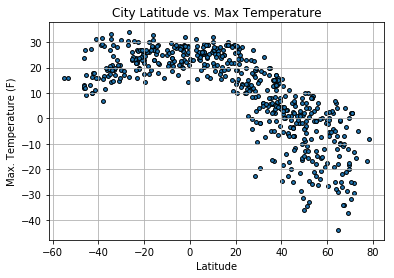

In [29]:
# Scatter Plot

#ax1= weather_df.scatter(x='Latitude',y='Temperature', c="Darkblue",markeredgecolor='black')
plt.scatter(weather_df["Latitude"],weather_df['Max Temp'], marker="o",edgecolor= 'black',s=15)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\Owner\Desktop\Matplotlib\Temp_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

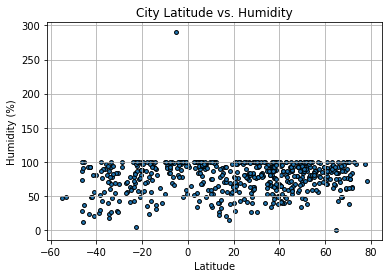

In [34]:
plt.scatter(weather_df["Latitude"],weather_df['Humidity'], marker="o",edgecolor= 'black',s=15)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"C:\Users\Owner\Desktop\Matplotlib\Humidity_vs_Latitude")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

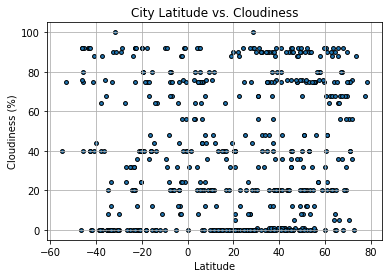

In [35]:
plt.scatter(weather_df["Latitude"],weather_df['Cloudiness'], marker="o",edgecolor= 'black',s=15)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output_Plots/Clouds_vs_Latitude.png")
plt.savefig(r"C:\Users\Owner\Desktop\Matplotlib\Clouds_vs_Latitude.png")
# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

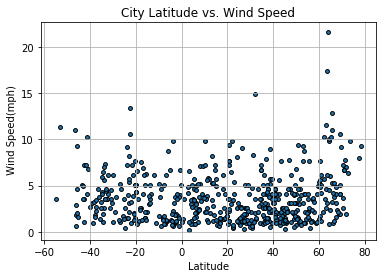

In [36]:
plt.scatter(weather_df["Latitude"],weather_df['Wind_Speed'], marker="o",edgecolor= 'black',s=15)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel(" Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output_Plots/Wind_vs_Latitude")
plt.savefig(r"C:\Users\Owner\Desktop\Matplotlib\Wind_vs_Latitude.png")
# Show plot
plt.show()


In [ ]:
Written description about the trends.
City latitude vs Max Temperature graph shows that the temperature is maximum as latitude reaches 0 degrees. While it decreases as latitude drive away from the equator.
Most of the high humidity cities lie in positive latitude area(>20 degrees)
Cloudiness seems to be more or less uniform throughout. Slightly higher cloudiness is observed in positive latitude areas.
Most cities have the wind speed between 0 to 5 mph, while higher wind speed is observed in few cities that lie in latitude between 60 and 70 degrees.

